## Observations and Insights 

### 1) For the drugs Capomulin and Ramicane "appear" to be the most effective treatments as the tumor volume and metastic sites were the lowest, even under longer timepoints.

### 2) However, the drugs Capomulin and Ramicane had the lightest average weights for their mice which seems to play a significant role in the tumor volume and how that could be interepreted.

### 3) Aside from the mice weight skewing the Capomulin and Ramicane results, there was a good balance on the count of timepoints for each drug tested as well as a good balance in the number of male mice and female mice that were used in the study.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
from scipy.stats import sem
from scipy.stats import linregress
from sklearn import datasets

# Set the seed so our data is reproducible
random.seed(42)

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results)

In [2]:
# View first data frame
mouse_metadata.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15


In [3]:
# View second data frame.
study_results.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0


In [4]:
# Checking the combined data frame.
combined_df.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1


In [5]:
# Counting the number rows of data for the combined data frame.
combined_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
cleaned_df = combined_df.drop_duplicates(["Mouse ID", "Timepoint"],keep= "last")
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(["Mouse ID"],keep= "last")

In [8]:
# Checking the number of mice in the clean DataFrame.
clean_df.count()

Mouse ID              249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
dtype: int64

## Summary Statistics

In [9]:
# Rename Columns to help with summary statistics
cleaned_df.rename(columns={"Mouse ID": "Mouse_ID", "Drug Regimen": "Drug_Regimen", "Mouse_ID": "Mouse_ID", "Weight (g)" : "Weight_grams", "Tumor Volume (mm3)": "Tumor_Volume"}, inplace=True)

/Users/normanadkins/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
# Confirm new column names were applied
cleaned_df.head()

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_grams,Timepoint,Tumor_Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
print(f"The mean tumor volume of all mice is: {round(cleaned_df.Tumor_Volume.mean(),6)}")
print(f"The median tumor volume of all mice is: {round(cleaned_df.Tumor_Volume.median(),6)}")
print(f"The variance of the tumor volume for all mice is from {round(cleaned_df.Tumor_Volume.min(),6)} to {round(cleaned_df.Tumor_Volume.max(),6)}")
print(f"The standard deviation of all mice tumors: {round(cleaned_df.Tumor_Volume.std(),6)}")
print(f"The standard error of all mice tumors: {round(cleaned_df.Tumor_Volume.sem(),6)}")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. Added timepoint for future calculation.
tumorvolume_mean =  cleaned_df.groupby(["Drug_Regimen"],as_index=True).Tumor_Volume.mean()
tumorvolume_median = cleaned_df.groupby(["Drug_Regimen"],as_index=True).Tumor_Volume.median()
tumorvolume_variance = cleaned_df.groupby(["Drug_Regimen"],as_index=True).Tumor_Volume.max() - cleaned_df.groupby(["Drug_Regimen"],as_index=True).Tumor_Volume.min()
tumorvolume_std = cleaned_df.groupby(["Drug_Regimen"],as_index=True).Tumor_Volume.std()
tumorvolume_sem = cleaned_df.groupby(["Drug_Regimen"],as_index=True).Tumor_Volume.sem()

# Prep for the bar chart
timepoint_count = cleaned_df.groupby(["Drug_Regimen"],as_index=True).Timepoint.count()

# Assemble the resulting series into a single summary dataframe.
tumor_analysis = pd.DataFrame({"Mean Tumor Volume": tumorvolume_mean, "Median Tumor Volume": tumorvolume_median, 
                               "Variance in Tumor Volume": tumorvolume_variance, "STD for Tumor Volume": tumorvolume_std, 
                               "SEM for Tumor Volume": tumorvolume_sem, "Timepoints Count": timepoint_count})
tumor_analysis

The mean tumor volume of all mice is: 50.448411
The median tumor volume of all mice is: 48.951421
The variance of the tumor volume for all mice is from 22.050126 to 78.567014
The standard deviation of all mice tumors: 8.904752
The standard error of all mice tumors: 0.204937


,Mean Tumor Volume,Median Tumor Volume,Variance in Tumor Volume,STD for Tumor Volume,SEM for Tumor Volume,Timepoints Count
Drug_Regimen,,,,,,
Capomulin,40.675741,41.557809,24.814612,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,23.923185,6.268188,0.469821,178
Infubinol,52.884795,51.820584,35.905385,6.567243,0.492236,178
Ketapril,55.235638,53.698743,33.567014,8.279709,0.603860,188
Naftisol,54.331565,52.509285,31.668817,8.134708,0.596466,186
Placebo,54.033581,52.288934,28.212939,7.821003,0.581331,181
Propriva,52.382993,50.783528,27.455421,6.574208,0.526358,156
Ramicane,40.216745,40.673236,25.572690,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,30.123690,7.710419,0.573111,181


In [12]:
# Convert to an index
Drug_Regimen = list(tumor_analysis.index.values)

In [13]:
# Confirm changes
Drug_Regimen

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

## Bar and Pie Charts

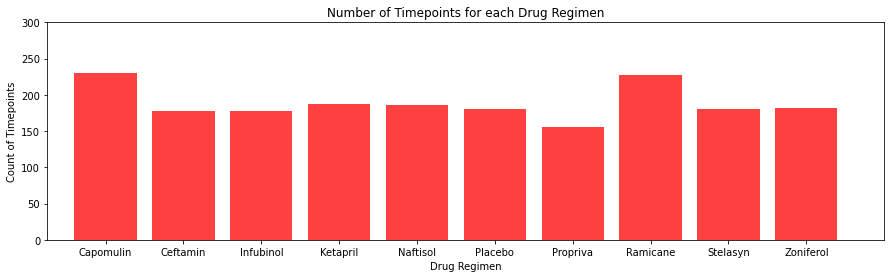

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Set the x_axis and tick_locations
x_axis = np.arange(0, len(tumor_analysis))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.figure(figsize=(15,4))
plt.title("Number of Timepoints for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Timepoints")

# Get the max count.  Then add some number to go beyond the highest data point.
plt.xlim(-0.75, 10)
plt.ylim(0, 300)
plt.bar(x_axis, tumor_analysis["Timepoints Count"], facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, Drug_Regimen)
plt.savefig("../figs/timepointsperdrug.png")
plt.show()

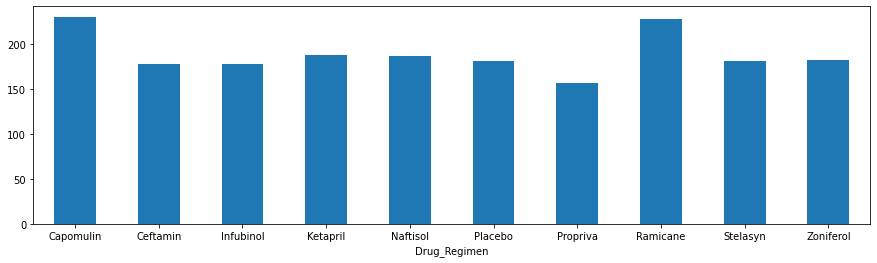

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_list = [Drug_Regimen]

timepoint_list = [timepoint_count]

index = [Drug_Regimen]

bar_df = pd.DataFrame({"Drug Regimen": drug_list,

                   "timepoints": timepoint_list}, index=index)

ax = timepoint_count.plot.bar(rot=0, figsize=(15,4))

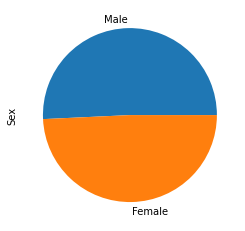

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_count = cleaned_df["Sex"].value_counts()

index = [Drug_Regimen]

pie_df = pd.DataFrame({"Sex": sex_count}, index=index)

ax = sex_count.plot.pie(rot=0, figsize=(15,4))

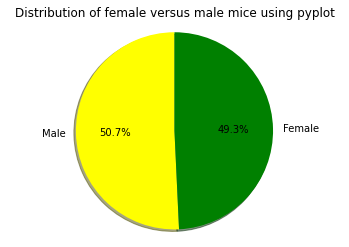

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Set characteristics
colors = ["yellow", "green"]
labels = ["Male", "Female"]
explode = (0, 0.05, 0, 0)
plt.title("Distribution of female versus male mice using pyplot")

# code for the plot
plt.pie(sex_count, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.savefig("../figs/sex_distribution.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# clean_df created "In [7]" and "In[8]" should have renamed columns to eliminate spaces.

clean_df.rename(columns={"Mouse ID": "Mouse_number", "Drug Regimen": "Drug", "Weight (g)" : "Weight_g", "Tumor Volume (mm3)": "Volume"}, inplace=True)
clean_df.head()

/Users/normanadkins/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Mouse_number,Drug,Sex,Age_months,Weight_g,Timepoint,Volume,Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin
# I created this df "In [7]"" and "In[8]".

# Drug_index = list(drug_volume.index.values)
drug_volume = clean_df.groupby(["Drug"],as_index=True).sum()
drug_volume.reset_index(level=0, inplace=True)
drug_volume

,Drug,Age_months,Weight_g,Timepoint,Volume,Metastatic Sites
0,Capomulin,351,503,1025,916.689193,32
1,Ceftamin,320,685,765,1443.849421,43
2,Infubinol,410,683,765,1454.456145,40
3,Ketapril,368,702,815,1570.154786,48
4,Naftisol,306,681,805,1530.143925,50
5,Placebo,267,701,780,1512.710359,52
6,Propriva,247,681,655,1418.424090,39
7,Ramicane,271,500,1015,904.784761,30
8,Stelasyn,315,669,785,1464.040958,35
9,Zoniferol,315,698,785,1479.531445,50


In [20]:
CRIC_volume = drug_volume.iloc[[0, 1, 2, 7], :]
CRIC_volume

,Drug,Age_months,Weight_g,Timepoint,Volume,Metastatic Sites
0,Capomulin,351,503,1025,916.689193,32
1,Ceftamin,320,685,765,1443.849421,43
2,Infubinol,410,683,765,1454.456145,40
7,Ramicane,271,500,1015,904.784761,30


In [21]:
# Put treatments into a list for for loop (and later for plot labels)

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

for drug in drugs:
    quartiles = cleaned_df["Tumor_Volume"].quantile([ .25, .5, .75])
    lowerq = quartiles[ 0.25]
    upperq = quartiles[ 0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - ( 1.5 * iqr)
    upper_bound = upperq + ( 1.5 * iqr)
    
    print(f'The lower quartile of {drug} in tumor values is {lowerq:,.2f}')
    print(f'The upper quartile of {drug} in tumor values is {upperq:,.2f}')
    print(f'The interquartile range of {drug} in tumor values is {iqr:,.2f}')
    print(f'Values below {lower_bound:,.2f} are {drug} outliers.')
    print(f'Values above {upper_bound:,.2f} are {drug} outliers.')
    print("--------------------------------------------------------------")

The lower quartile of Capomulin in tumor values is 45.00
The upper quartile of Capomulin in tumor values is 56.32
The interquartile range of Capomulin in tumor values is 11.32
Values below 28.01 are Capomulin outliers.
Values above 73.31 are Capomulin outliers.
--------------------------------------------------------------
The lower quartile of Ramicane in tumor values is 45.00
The upper quartile of Ramicane in tumor values is 56.32
The interquartile range of Ramicane in tumor values is 11.32
Values below 28.01 are Ramicane outliers.
Values above 73.31 are Ramicane outliers.
--------------------------------------------------------------
The lower quartile of Infubinol in tumor values is 45.00
The upper quartile of Infubinol in tumor values is 56.32
The interquartile range of Infubinol in tumor values is 11.32
Values below 28.01 are Infubinol outliers.
Values above 73.31 are Infubinol outliers.
--------------------------------------------------------------
The lower quartile of Ceftamin

In [22]:
cleaned_df.head(10)

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_grams,Timepoint,Tumor_Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


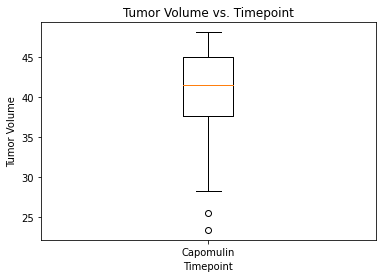

In [23]:
# Generate a box plot of tumor volume vs. time point for a mouse treated with Capomulin
drugs = cleaned_df.loc[cleaned_df["Drug_Regimen"] == "Capomulin", :]
box_vol1 = drugs["Tumor_Volume"]
box_tp = drugs["Timepoint"]

fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume vs. Timepoint")
ax1.set_ylabel("Tumor Volume")
ax1.set_xlabel("Timepoint")

ax1.boxplot(box_vol1, labels=["Capomulin"])
plt.show()

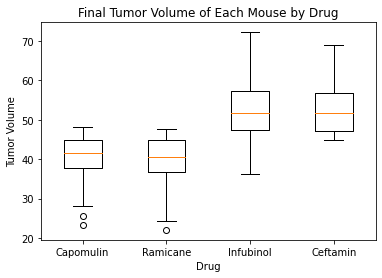

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drug_focus = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Capture timepoint and tumor volume values across drugs of interest.
capo = cleaned_df.loc[cleaned_df["Drug_Regimen"] == "Capomulin", :]
capo_vol1 = capo["Tumor_Volume"]
capo_tp = capo["Timepoint"]
ram = cleaned_df.loc[cleaned_df["Drug_Regimen"] == "Ramicane", :]
ram_vol1 = ram["Tumor_Volume"]
ram_tp = ram["Timepoint"]
inf = cleaned_df.loc[cleaned_df["Drug_Regimen"] == "Infubinol", :]
inf_vol1 = inf["Tumor_Volume"]
inf_tp = inf["Timepoint"]
ceft = cleaned_df.loc[cleaned_df["Drug_Regimen"] == "Ceftamin", :]
ceft_vol1 = ceft["Tumor_Volume"]
ceft_tp = ceft["Timepoint"]

box_vol1 = [capo_vol1, ram_vol1, inf_vol1, ceft_vol1]


fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Each Mouse by Drug")
ax1.set_ylabel("Tumor Volume")
ax1.set_xlabel("Drug")

ax1.boxplot(box_vol1, labels=drug_focus)
plt.savefig("../figs/tumorvolume_by_drug.png")
plt.show()

## Line and Scatter Plots

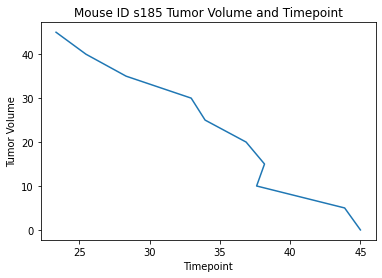

In [25]:
# Generate a box plot of tumor volume vs. time point for a mouse treated with Capomulin
cap = cleaned_df.loc[cleaned_df["Drug_Regimen"] == "Capomulin", :]
mouse_sample = cap.loc[cap["Mouse_ID"] == "s185"]
scatter_tp = mouse_sample["Timepoint"].tolist()
scatter_vol1 = mouse_sample["Tumor_Volume"].tolist()

plt.title("Mouse ID s185 Tumor Volume and Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

plt.plot(scatter_vol1, scatter_tp)
plt.savefig("../figs/timepointsperdrug_1mouse.png")
plt.show()

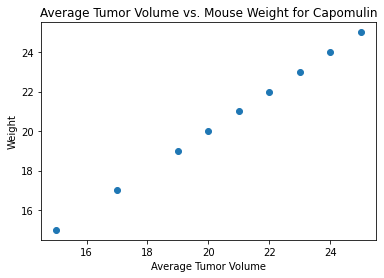

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Groupings
wt_group = cap.groupby(["Weight_grams"])
tum_avg = wt_group["Weight_grams"].mean()

# New DataFrame with Groupings
average = pd.DataFrame(tum_avg)
average_tumor = average["Weight_grams"].tolist()

# Add the average as an index
weight = average.index.tolist()

# Scatter Plot
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")
plt.xlabel("Average Tumor Volume")
plt.ylabel("Weight")
plt.scatter(average_tumor, weight)
plt.show()


## Correlation and Regression

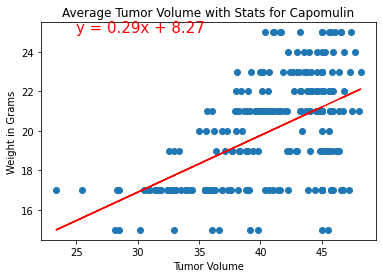

The r-squared is: 0.2763600223455911


In [27]:
# Calculate the correlation coefficient and linear regression model for Capomulin

x_values = cap["Tumor_Volume"]
y_values = cap["Weight_grams"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25, 25),fontsize=15,color="red")

plt.title("Average Tumor Volume with Stats for Capomulin")
plt.xlabel("Tumor Volume")
plt.ylabel("Weight in Grams")
plt.savefig("../figs/capomulin_linear_regression.png")
plt.show()

print(f"The r-squared is: {rvalue**2}")

#### NOTE: THERE IS A LARGE GAP BETWEEN THE R-SQUARED RESULT AND THE ACTUAL LINEAR REGRESSION ####